In [72]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [73]:
salary_data = pd.read_csv('Salary_Data.csv')
salary_data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


## Data Understanding

### Initial Analysis

In [74]:
salary_data.shape

(30, 2)

In [75]:
salary_data.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [77]:
salary_data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [78]:
salary_data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [79]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


## EDA and Data Visualization

<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

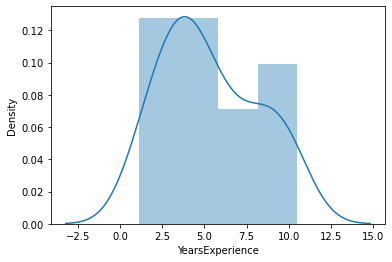

In [80]:
sns.distplot(salary_data['YearsExperience'])

<AxesSubplot:xlabel='Salary', ylabel='Density'>

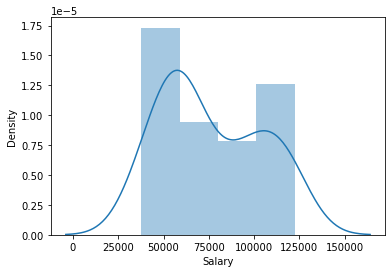

In [81]:
sns.distplot(salary_data['Salary'])

## Assumption Check

### Linearity Check

[]

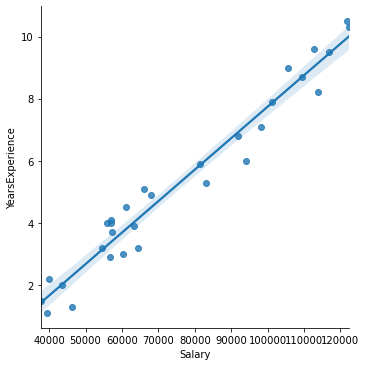

In [6]:
sns.lmplot(x='Salary',y='YearsExperience',data=salary_data)
plt.plot()

### Normality Check

[]

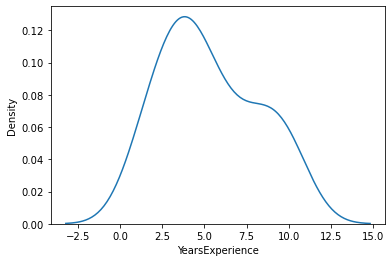

In [7]:
sns.distplot(a=salary_data['YearsExperience'],hist=False)
plt.plot()

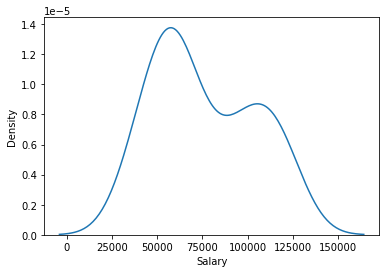

In [8]:
sns.distplot(a=salary_data['Salary'],hist=False)
plt.show()

In [82]:
salary_data.skew()

YearsExperience    0.37956
Salary             0.35412
dtype: float64

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

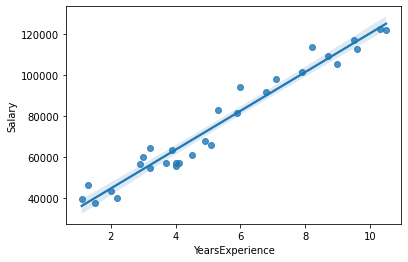

In [83]:
sns.regplot(x='YearsExperience',y='Salary',data=salary_data)

## Model Building

In [84]:
x=salary_data['YearsExperience']
y=salary_data['Salary']

In [85]:
import statsmodels.formula.api as smf

In [86]:
linear_model = smf.ols(formula='y~x',data=salary_data).fit()

In [116]:
linear_model.params

Intercept    25792.200199
x             9449.962321
dtype: float64

In [117]:
# Finding tvalues and pvalues
linear_model.tvalues , linear_model.pvalues

(Intercept    11.346940
 x            24.950094
 dtype: float64,
 Intercept    5.511950e-12
 x            1.143068e-20
 dtype: float64)

In [89]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 05 Apr 2022   Prob (F-statistic):           1.14e-20
Time:                        15:51:09   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
x           9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model Evaluation

In [90]:
y_pred = linear_model.predict(salary_data)

In [91]:
from sklearn.metrics import mean_squared_error,r2_score
print('mean squared error is ',mean_squared_error(y,y_pred))
print('r2 score is ',r2_score(y,y_pred))

mean squared error is  31270951.72228097
r2 score is  0.9569566641435086


### Taking Log Transformation

In [92]:
log_x = np.log(salary_data[['YearsExperience']])

In [93]:
frames = [log_x,y]
log_model = pd.concat(frames,axis=1)
log_model

,YearsExperience,Salary
0,0.095310,39343.0
1,0.262364,46205.0
2,0.405465,37731.0
3,0.693147,43525.0
4,0.788457,39891.0
5,1.064711,56642.0
6,1.098612,60150.0
7,1.163151,54445.0
8,1.163151,64445.0
9,1.308333,57189.0


In [94]:
Linear_model_1 = smf.ols(formula='y~log_x',data=log_model).fit()
Linear_model_1

In [96]:
Linear_model_1.params

Intercept    14927.97177
log_x        40581.98796
dtype: float64

In [97]:
Linear_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Tue, 05 Apr 2022   Prob (F-statistic):           3.25e-13
Time:                        15:51:55   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
log_x       4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [98]:
y_pred_1 = Linear_model_1.predict(log_x)

In [99]:
from sklearn.metrics import mean_squared_error,r2_score
print('mean squared error is ',mean_squared_error(y,y_pred_1))
print('r2 score is ',r2_score(y,y_pred_1))

mean squared error is  106149618.72183877
r2 score is  0.853888882875697


### Taking Sqrt Transformation

In [100]:
sqrt_x = np.sqrt(salary_data[['YearsExperience']])

In [101]:
frames = [sqrt_x,y]
sqrt_model = pd.concat(frames,axis=1)
sqrt_model

,YearsExperience,Salary
0,1.048809,39343.0
1,1.140175,46205.0
2,1.224745,37731.0
3,1.414214,43525.0
4,1.483240,39891.0
5,1.702939,56642.0
6,1.732051,60150.0
7,1.788854,54445.0
8,1.788854,64445.0
9,1.923538,57189.0


In [102]:
Linear_model_2 = smf.ols(formula='y~sqrt_x',data=log_model).fit()
Linear_model_2

In [104]:
Linear_model_2.params

Intercept   -16055.769117
sqrt_x       41500.680583
dtype: float64

In [105]:
Linear_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     377.8
Date:                Tue, 05 Apr 2022   Prob (F-statistic):           8.57e-18
Time:                        15:52:22   Log-Likelihood:                -308.52
No. Observations:                  30   AIC:                             621.0
Df Residuals:                      28   BIC:                             623.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.606e+04   4921.599     -3.262      0.003   -2.61e+04   -5974.331
sqrt_x       4.15e+04   2135.122     19.437      0.000    3.71e+04    4.59e+04
==============================================================================
Omnibus:                        0.588   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.638
Skew:                           0.011   Prob(JB):                        0.727
Kurtosis:                       2.286   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [106]:
y_pred_2 = Linear_model_2.predict(sqrt_x)

In [107]:
print('mean squared error is ',mean_squared_error(y,y_pred_2))
print('r2 score is ',r2_score(y,y_pred_2))

mean squared error is  50127755.61652501
r2 score is  0.9310009544993526


### Taking Square Transformation

In [108]:
square_x = np.sqrt(salary_data[['YearsExperience']])

In [109]:
frames = [square_x,y]
square_model = pd.concat(frames,axis=1)
square_model

,YearsExperience,Salary
0,1.048809,39343.0
1,1.140175,46205.0
2,1.224745,37731.0
3,1.414214,43525.0
4,1.483240,39891.0
5,1.702939,56642.0
6,1.732051,60150.0
7,1.788854,54445.0
8,1.788854,64445.0
9,1.923538,57189.0


In [110]:
Linear_model_3 = smf.ols(formula='y~sqrt_x',data=log_model).fit()
Linear_model_3

In [112]:
Linear_model_3.params

Intercept   -16055.769117
sqrt_x       41500.680583
dtype: float64

In [113]:
Linear_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     377.8
Date:                Tue, 05 Apr 2022   Prob (F-statistic):           8.57e-18
Time:                        15:52:44   Log-Likelihood:                -308.52
No. Observations:                  30   AIC:                             621.0
Df Residuals:                      28   BIC:                             623.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.606e+04   4921.599     -3.262      0.003   -2.61e+04   -5974.331
sqrt_x       4.15e+04   2135.122     19.437      0.000    3.71e+04    4.59e+04
==============================================================================
Omnibus:                        0.588   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.638
Skew:                           0.011   Prob(JB):                        0.727
Kurtosis:                       2.286   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
y_pred_3 = Linear_model_3.predict(sqrt_x)

In [115]:
print('mean squared error is ',mean_squared_error(y,y_pred_3))
print('r2 score is ',r2_score(y,y_pred_3))

mean squared error is  50127755.61652501
r2 score is  0.9310009544993526


### Inference
From the above Models, square root and square transformed model is better model than the original model